In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rc('figure', figsize=(10,6))




In [66]:
#input data yang lebih mudah
data = pd.read_csv('Video_Games_Sales_2019.csv', usecols=['Rank','Name','Genre','Platform','Publisher','Global_Sales','NA_Sales','PAL_Sales','JP_Sales','Year;','Developer'], index_col=['Rank'])
data

,Name,Genre,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year;
Rank,,,,,,,,,,
1,Wii Sports,Sports,Wii,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN,2006.0;
2,Super Mario Bros.,Platform,NES,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN,1985.0;
3,Mario Kart Wii,Racing,Wii,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN,2008.0;
4,PlayerUnknown's Battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,NaN,NaN,2017.0;
5,Wii Sports Resort,Sports,Wii,Nintendo,Nintendo EAD,NaN,NaN,NaN,NaN,2009.0;
...,...,...,...,...,...,...,...,...,...,...
55788,Indivisible,Role-Playing,PC,505 Games,Lab Zero Games,NaN,NaN,NaN,NaN,2019.0;
55789,Lost Ember,Adventure,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,2019.0;
55790,Lost Ember,Adventure,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,NaN,NaN,2019.0;


In [67]:
# Mengurutkan data berdasarkan tahun
waktudata = data.copy()
# waktudata['Year;'] = data['Year;'].fillna(data['Year;'].mean())
waktudata = data[data['Year;'].notna()]  
waktudata = waktudata.sort_values('Year;', ascending=True)
waktudata


,Name,Genre,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year;
Rank,,,,,,,,,,
22027,Afterfall,Action,PC,Unknown,Intoxicate Interactive,NaN,NaN,NaN,NaN,1970.0;
7969,Danganronpa: Trigger Happy Havoc,Adventure,PSP,Unknown,Spike,0.24,NaN,NaN,0.24,1970.0;
40974,Pirates of the Caribbean: Armada of the Damned,Role-Playing,X360,Unknown,Propaganda Games,NaN,NaN,NaN,NaN,1970.0;
40975,Pirates of the Caribbean: Armada of the Damned,Role-Playing,Wii,Unknown,Propaganda Games,NaN,NaN,NaN,NaN,1970.0;
48260,The Grinder,Shooter,PC,Unknown,High Voltage Software,NaN,NaN,NaN,NaN,1970.0;
...,...,...,...,...,...,...,...,...,...,...
54144,Lone Survivor,Misc,PS4,Unknown,Curve Studios,NaN,NaN,NaN,NaN,;
54136,Little Red Hood,Action,NES,Unknown,Joy Van,NaN,NaN,NaN,NaN,;
54131,Linked,Puzzle,PC,Unknown,ThinkOfGames,NaN,NaN,NaN,NaN,;


In [68]:
#Mengisi data yang hilang menjadi nol
data1 = waktudata.fillna(0)
data1

,Name,Genre,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year;
Rank,,,,,,,,,,
22027,Afterfall,Action,PC,Unknown,Intoxicate Interactive,0.00,0.0,0.0,0.00,1970.0;
7969,Danganronpa: Trigger Happy Havoc,Adventure,PSP,Unknown,Spike,0.24,0.0,0.0,0.24,1970.0;
40974,Pirates of the Caribbean: Armada of the Damned,Role-Playing,X360,Unknown,Propaganda Games,0.00,0.0,0.0,0.00,1970.0;
40975,Pirates of the Caribbean: Armada of the Damned,Role-Playing,Wii,Unknown,Propaganda Games,0.00,0.0,0.0,0.00,1970.0;
48260,The Grinder,Shooter,PC,Unknown,High Voltage Software,0.00,0.0,0.0,0.00,1970.0;
...,...,...,...,...,...,...,...,...,...,...
54144,Lone Survivor,Misc,PS4,Unknown,Curve Studios,0.00,0.0,0.0,0.00,;
54136,Little Red Hood,Action,NES,Unknown,Joy Van,0.00,0.0,0.0,0.00,;
54131,Linked,Puzzle,PC,Unknown,ThinkOfGames,0.00,0.0,0.0,0.00,;


In [69]:
data1.sort_values('Genre') 

,Name,Genre,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year;
Rank,,,,,,,,,,
22027,Afterfall,Action,PC,Unknown,Intoxicate Interactive,0.00,0.00,0.00,0.00,1970.0;
26878,Comix Zone,Action,VC,Sega,Sega,0.00,0.00,0.00,0.00,2007.0;
6113,Pirates of the Caribbean: At World's End,Action,DS,Disney Interactive Studios,Amaze Entertainment,0.34,0.30,0.01,0.01,2007.0;
6265,Bee Movie Game,Action,Wii,Activision,Smart Bomb Interactive,0.33,0.30,0.01,0.00,2007.0;
6300,Naruto: Rise of a Ninja,Action,X360,Ubisoft,Ubisoft Montreal,0.33,0.29,0.01,0.00,2007.0;
...,...,...,...,...,...,...,...,...,...,...
15343,Diabolik Lovers,Visual Novel,PSP,Idea Factory,Rejet,0.05,0.00,0.00,0.05,2012.0;
19488,Yoshiwara Higanbana Kuon no Chigiri,Visual Novel,PSV,Prototype,Prototype,0.01,0.00,0.00,0.01,2017.0;
17902,Higurashi no Naku Koro ni Hou,Visual Novel,NS,Entergram,07th Expansion,0.02,0.00,0.00,0.02,2018.0;


Tujuan 2

In [70]:
#Mengurutkan data berdasarkan Genre
data1.groupby('Genre')[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']].sum().sort_values(by='Genre')

,Global_Sales,NA_Sales,PAL_Sales,JP_Sales
Genre,,,,
Action,1195.54,618.62,363.25,90.47
Action-Adventure,155.45,67.84,62.51,5.60
Adventure,337.38,162.21,96.41,46.77
Board Game,0.31,0.06,0.22,0.02
Education,0.09,0.08,0.00,0.00
Fighting,357.44,180.60,83.57,63.03
MMO,11.86,4.88,3.42,2.36
Misc,579.62,299.76,151.39,68.19
Music,52.81,25.98,15.16,6.74


In [71]:
#Mengurutkan data genre berdasarkan index
data_genre = data1.groupby('Genre')[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']].sum().sort_values(by='Global_Sales',ascending=False)
data_genre1 = data_genre.reset_index().melt(id_vars = 'Genre') 
data_genre1

,Genre,variable,value
0,Sports,Global_Sales,1208.00
1,Action,Global_Sales,1195.54
2,Shooter,Global_Sales,1044.21
3,Misc,Global_Sales,579.62
4,Racing,Global_Sales,542.40
...,...,...,...
75,Party,JP_Sales,0.65
76,Visual Novel,JP_Sales,2.69
77,Sandbox,JP_Sales,0.52
78,Board Game,JP_Sales,0.02


In [72]:
data_genre2 = data_genre1[data_genre1['variable']!='Global_Sales']
data_genre2

,Genre,variable,value
20,Sports,NA_Sales,615.72
21,Action,NA_Sales,618.62
22,Shooter,NA_Sales,562.25
23,Misc,NA_Sales,299.76
24,Racing,NA_Sales,276.02
25,Role-Playing,NA_Sales,191.91
26,Platform,NA_Sales,224.50
27,Fighting,NA_Sales,180.60
28,Adventure,NA_Sales,162.21
29,Simulation,NA_Sales,156.85


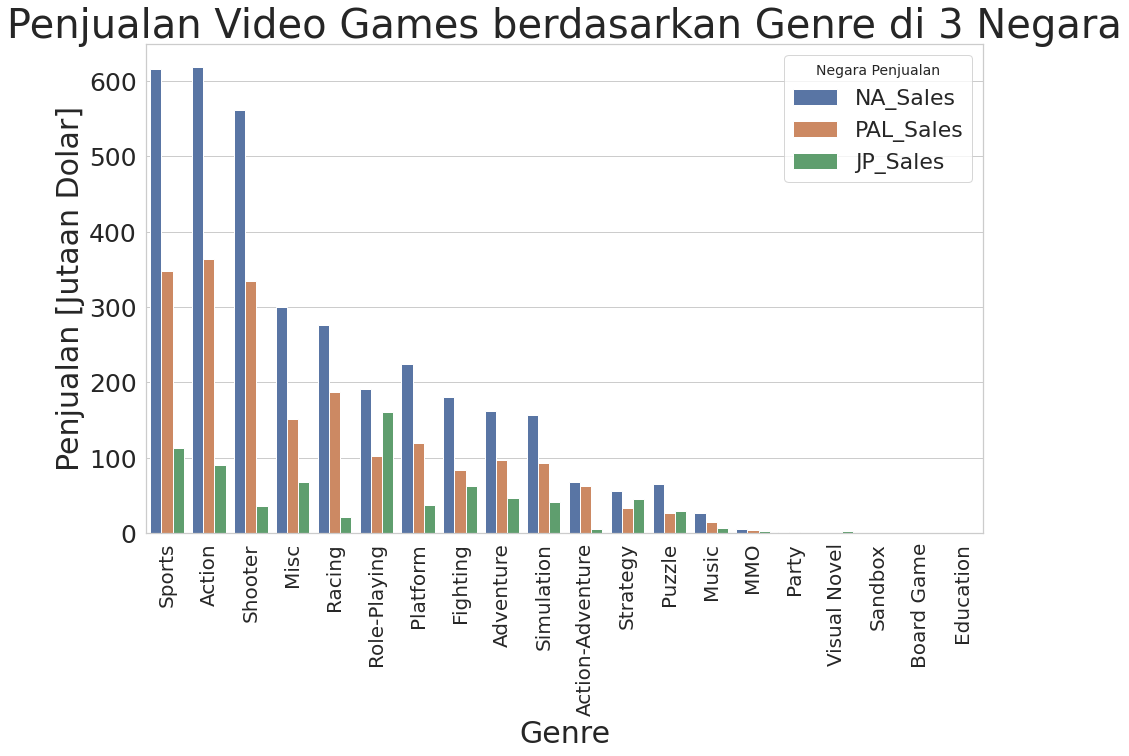

In [94]:
#Plot Penjualan Video Games Berdasarkan Genre di 3 Negara 
plt.figure(figsize=(15,9))
sns.set_context('paper')
sns.set(style='whitegrid')
sns.barplot(x='Genre',y='value', hue = 'variable', data=data_genre2, estimator=sum).set_title("Penjualan Video Games berdasarkan Genre di 3 Negara",fontsize=40);
sns.color_palette("Paired")
plt.legend(title='Negara Penjualan', loc = 'upper right', fontsize = 22,title_fontsize=14)
plt.ylabel('Penjualan [Jutaan Dolar]', fontsize=30)
plt.xlabel('Genre',fontsize=30)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20, rotation=90)
plt.savefig('Penjualan Genre.jpg', quality=95, dpi = 1000)

In [74]:
genre_amerika = data1[['Genre','NA_Sales']]
genre_amerika1 = genre_amerika.groupby("Genre",as_index=False).sum()
genre_amerika1 = genre_amerika1.sort_values(by=['NA_Sales'],ascending=False)
amerika_10 = genre_amerika1.head(10)
import plotly.express as px
fig = px.bar(amerika_10, x="Genre", y="NA_Sales", color="NA_Sales", title="Top 10 Genre Video Games Terjual di Amerika ( Jutaan Dollar)")
fig.show()


In [75]:
genre_australia = data1[['Genre','PAL_Sales']]
genre_australia1 = genre_australia.groupby("Genre",as_index=False).sum()
genre_australia1 = genre_australia1.sort_values(by=['PAL_Sales'],ascending=False)
australia_10 = genre_australia1.head(10)
import plotly.express as px
fig = px.bar(australia_10, x="Genre", y="PAL_Sales", color="PAL_Sales", title="Top 10 Genre Video Games Terjual di Australia ( Jutaan Dollar)")
fig.show()

In [76]:
genre_jepang = data1[['Genre','JP_Sales']]
genre_jepang1 = genre_jepang.groupby("Genre",as_index=False).sum()
genre_jepang1 = genre_jepang1.sort_values(by=['JP_Sales'],ascending=False)
jepang_10 = genre_jepang1.head(10)
import plotly.express as px
fig = px.bar(jepang_10, x="Genre", y="JP_Sales", color="JP_Sales", title="Top 10 Genre Video Games Terjual di Jepang ( Jutaan Dollar)")
fig.show()

Tujuan 3

In [77]:
#Mengurutkan data berdasarkan Platform
data1.groupby('Platform')[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']].sum().sort_values(by='Platform')

,Global_Sales,NA_Sales,PAL_Sales,JP_Sales
Platform,,,,
2600,88.82,82.90,5.00,0.00
3DO,0.19,0.00,0.00,0.19
3DS,115.56,34.85,23.55,51.82
5200,0.00,0.00,0.00,0.00
7800,0.00,0.00,0.00,0.00
...,...,...,...,...
XBL,0.22,0.12,0.07,0.00
XOne,278.00,170.65,81.49,0.39
ZXS,0.00,0.00,0.00,0.00


In [78]:
#Mengurutkan data platform berdasarkan index
data_platform = data1.groupby('Platform')[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']].sum().sort_values(by='Global_Sales',ascending=False)
data_platform1 = data_platform.reset_index().melt(id_vars = 'Platform') 
data_platform1

,Platform,variable,value
0,PS2,Global_Sales,1090.68
1,PS3,Global_Sales,902.29
2,X360,Global_Sales,882.96
3,PS,Global_Sales,618.03
4,PS4,Global_Sales,583.98
...,...,...,...
287,Linux,JP_Sales,0.00
288,NGage,JP_Sales,0.00
289,Lynx,JP_Sales,0.00
290,MS,JP_Sales,0.00


In [79]:
data_platform2 = data_platform1[data_platform1['variable']!='Global_Sales']
data_platform2

,Platform,variable,value
73,PS2,NA_Sales,517.39
74,PS3,NA_Sales,377.39
75,X360,NA_Sales,543.10
76,PS,NA_Sales,294.44
77,PS4,NA_Sales,207.03
...,...,...,...
287,Linux,JP_Sales,0.00
288,NGage,JP_Sales,0.00
289,Lynx,JP_Sales,0.00
290,MS,JP_Sales,0.00


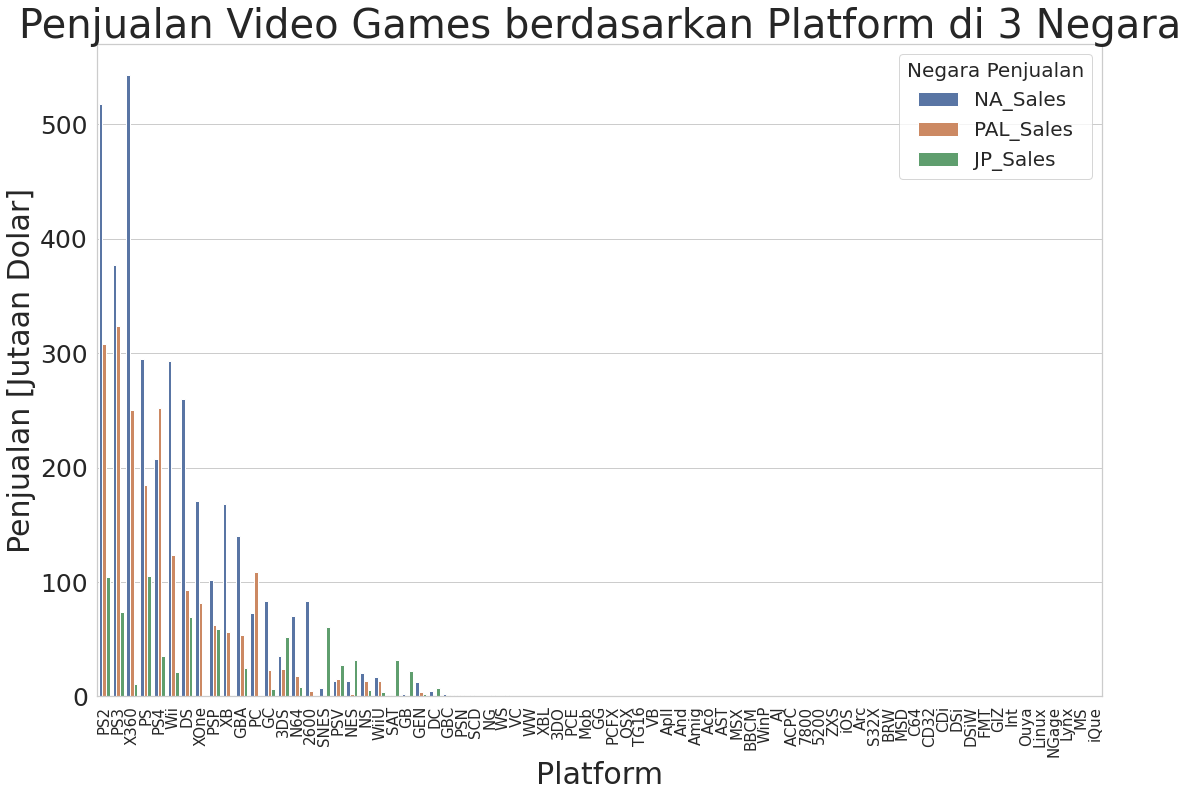

In [96]:
#Plot Penjualan Video Games Berdasarkan Platform di 3 Negara 
plt.figure(figsize=(18,12))
sns.set_context('notebook')
sns.set(style='whitegrid')
sns.barplot(x='Platform',y='value', hue = 'variable', data=data_platform2, estimator=sum).set_title("Penjualan Video Games berdasarkan Platform di 3 Negara",fontsize=40);
plt.legend(title='Negara Penjualan', loc = 'upper right', fontsize = 20,title_fontsize=20)
plt.ylabel('Penjualan [Jutaan Dolar]', fontsize=30)
plt.xlabel('Platform',fontsize=30)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 15, rotation=90)
plt.savefig('Penjualan Platform.jpg', quality=95, dpi = 1000)

In [81]:
platform_amerika = data1[['Platform','NA_Sales']]
platform_amerika1 = platform_amerika.groupby("Platform",as_index=False).sum()
platform_amerika1 = platform_amerika1.sort_values(by=['NA_Sales'],ascending=False)
platform_10 = platform_amerika1.head(10)
import plotly.express as px
fig = px.bar(platform_10, x="Platform", y="NA_Sales", color="NA_Sales", title="Top 10 Platform Video Games Terjual di Amerika ( Jutaan Dollar)")
fig.show()

In [82]:
platform_australia = data1[['Platform','PAL_Sales']]
platform_australia1 = platform_australia.groupby("Platform",as_index=False).sum()
platform_australia1 = platform_australia1.sort_values(by=['PAL_Sales'],ascending=False)
platform_10 = platform_australia1.head(10)
import plotly.express as px
fig = px.bar(platform_10, x="Platform", y="PAL_Sales", color="PAL_Sales", title="Top 10 Platform Video Games Terjual di Australia ( Jutaan Dollar)")
fig.show()

In [83]:
data1.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Platform
PS2     1090.68
PS3      902.29
X360     882.96
PS       618.03
PS4      583.98
Wii      479.31
DS       456.17
XOne     278.00
PSP      261.06
XB       233.62
Name: Global_Sales, dtype: float64

In [84]:
platform_jepang = data1[['Platform','JP_Sales']]
platform_jepang1 = platform_jepang.groupby("Platform",as_index=False).sum()
platform_jepang1 = platform_jepang1.sort_values(by=['JP_Sales'],ascending=False)
platform_10 = platform_jepang1.head(10)
import plotly.express as px
fig = px.bar(platform_10, x="Platform", y="JP_Sales", color="JP_Sales", title="Top 10 Platform Video Games Terjual di Jepang ( Jutaan Dollar)")
fig.show()

TUJUAN 4 
Mengurutkan publisher terbaik berdasarkan penjualan global

In [85]:
data1.groupby('Publisher')[['Global_Sales']].sum().sort_values(by='Publisher').head(20)

,Global_Sales
Publisher,
100 Gates,0.00
10TACLE Studios,0.48
10tons,0.00
10tons Ltd,0.00
11 bit studios,0.04
1337 Game Design,0.00
13cm,0.00
14 Degrees East,0.00
17-Bit,0.00


In [86]:
 data1.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Publisher
Activision                     717.43
Electronic Arts                652.07
EA Sports                      497.62
Ubisoft                        477.32
Sony Computer Entertainment    427.77
THQ                            321.63
Konami                         249.64
Rockstar Games                 240.50
Sega                           204.88
Nintendo                       155.82
Name: Global_Sales, dtype: float64

In [87]:
#Mengurutkan data berdasarkan Publisher
data1.groupby('Publisher')[['Global_Sales','NA_Sales','PAL_Sales','JP_Sales']].sum().sort_values(by='Publisher')

,Global_Sales,NA_Sales,PAL_Sales,JP_Sales
Publisher,,,,
100 Gates,0.00,0.00,0.00,0.0
10TACLE Studios,0.48,0.33,0.15,0.0
10tons,0.00,0.00,0.00,0.0
10tons Ltd,0.00,0.00,0.00,0.0
11 bit studios,0.04,0.00,0.03,0.0
...,...,...,...,...
tono / Ctrl+k,0.00,0.00,0.00,0.0
tri-Ace,0.00,0.00,0.00,0.0
uClick,0.00,0.00,0.00,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



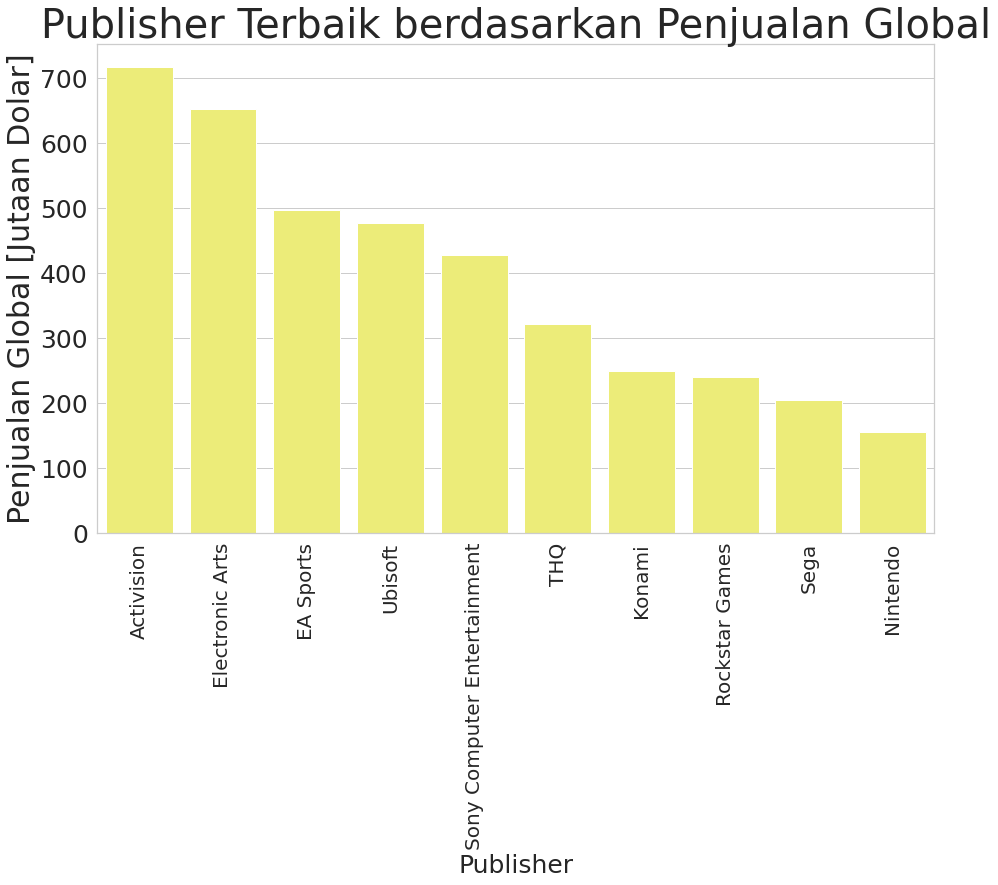

In [93]:
plt.figure(figsize=(15,9))
sns.set_context('paper')
sns.set(style="whitegrid")
x = data1.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
x
ax = sns.barplot(x.index, x,color='#ff6a')
ax.set_title('Publisher Terbaik berdasarkan Penjualan Global',fontsize=40)
ax.set_ylabel('Penjualan Global [Jutaan Dolar]',fontsize=30)
ax.set_xlabel('Publisher',fontsize=25)
plt.xticks(fontsize=20,rotation = 90)
plt.yticks(fontsize = 25)
plt.savefig('Penjualan Video Game Berdasarkan Publisher Terbaik.jpg', quality=95, dpi = 1000)

In [89]:
 data1.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False).head(10)

Developer
EA Canada            277.87
EA Tiburon           186.19
Ubisoft Montreal     172.96
Treyarch             150.19
Traveller's Tales    148.69
Konami               119.74
Infinity Ward        118.97
Rockstar North       116.91
Capcom                99.80
Visual Concepts       97.61
Name: Global_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



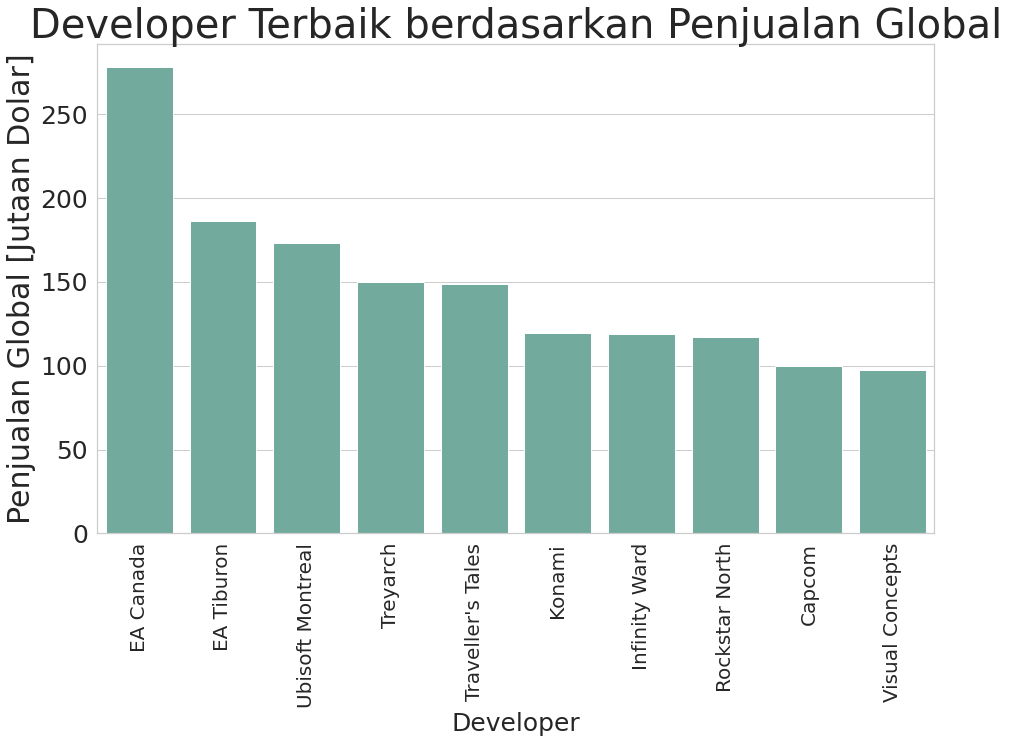

In [92]:
plt.figure(figsize=(15,9))
sns.set_context('notebook')
sns.set(style="whitegrid")
x = data1.groupby('Developer')['Global_Sales'].sum().sort_values(ascending=False).head(10)
x
ax = sns.barplot(x.index, x,color='#69b3a2')
ax.set_title('Developer Terbaik berdasarkan Penjualan Global',fontsize=40)
ax.set_ylabel('Penjualan Global [Jutaan Dolar]',fontsize=30)
ax.set_xlabel('Developer',fontsize=25)
plt.xticks(fontsize=20,rotation = 90)
plt.yticks(fontsize = 25)
plt.savefig('Penjualan Video Game Berdasarkan Developer Terbaik.jpg', quality=95, dpi = 1000)